In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os, re, glob,sys
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.models import load_model
import numpy as np

np.random.seed(777)


Using TensorFlow backend.


In [2]:
print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)
print('OpenCV version : ', cv2.__version__)

Python version :  3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
TensorFlow version :  1.13.1
Keras version :  2.2.4
OpenCV version :  4.1.2


In [3]:
dir_path = './extracted_images_v2/'
categories =os.listdir(dir_path+"train")
num_classes = len(categories)

In [4]:
train_dir = os.path.join(dir_path, 'train')
validation_dir = os.path.join(dir_path, 'validation')
test_dir = os.path.join(dir_path, 'test')

In [5]:
image_w = 45
image_h = 45
X_train = []
Y_train = []


In [9]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10, #회전각 10도
    width_shift_range=0.1, #상하로 10% 이동
    height_shift_range=0.1, #좌우로 10% 이동
    shear_range=0.1, #0.1 라디안 내외 시계반대방향 변형
    zoom_range=0.2) #축소,확대


train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(45,45),
    batch_size=100,
    class_mode='categorical')
#    color_mode = 'grayscale')

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(45,45),
    batch_size=100,
    class_mode='categorical')
#    color_mode = 'grayscale')

test_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(45,45),
    batch_size=100,
    class_mode='categorical')
#    color_mode = 'grayscale')

Found 95481 images belonging to 46 classes.
Found 31842 images belonging to 46 classes.
Found 31842 images belonging to 46 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model
import cv2

In [11]:
from keras import models,layers

In [12]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(45,45,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(46,activation='softmax')

Instructions for updating:
Colocations handled automatically by placer.


"\nmodel.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(45,45,3)))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(2025, activation='relu'))\nmodel.add(layers.Dropout(0.2),)\nmodel.add(layers.Dense(46, activation='softmax'))\nmodel.summary()\n"

In [13]:
from keras import optimizers

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [17]:
#model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit_generator(train_generator, 
    epochs=100,#총 30번
    steps_per_epoch=10, #에폭 당 스텝 수, 즉 배치size가 10이므로 1000개씩만 돌리는 거임
    validation_data=validation_generator, #검증용 데이터로 평가
    validation_steps=10,  #검증용 데이터는 10개(배치) * 10번 즉 100번만
    callbacks=[early_stopping]
                             
)
model.save('model_keras_nomal.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 9s 946ms/step - loss: 3.6651 - acc: 0.1610 - val_loss: 3.3897 - val_acc: 0.1760
Epoch 2/100
10/10 [==============================] - 8s 813ms/step - loss: 3.1559 - acc: 0.2240 - val_loss: 3.0047 - val_acc: 0.2130
Epoch 3/100
10/10 [==============================] - 9s 899ms/step - loss: 2.9805 - acc: 0.2320 - val_loss: 2.8770 - val_acc: 0.2200
Epoch 4/100
10/10 [==============================] - 9s 893ms/step - loss: 2.8530 - acc: 0.2330 - val_loss: 2.8665 - val_acc: 0.1480
Epoch 5/100
10/10 [==============================] - 9s 949ms/step - loss: 2.8715 - acc: 0.2210 - val_loss: 2.8411 - val_acc: 0.2020
Epoch 6/100
10/10 [==============================] - 9s 934ms/step - loss: 2.8361 - acc: 0.2260 - val_loss: 2.8651 - val_acc: 0.2210
Epoch 7/100
10/10 [==============================] - 8s 800ms/step - loss: 2.8014 - acc: 0.2380 - val_loss: 2.8136 - val_acc: 0.1690
Epoch 8/100
10/10 [==

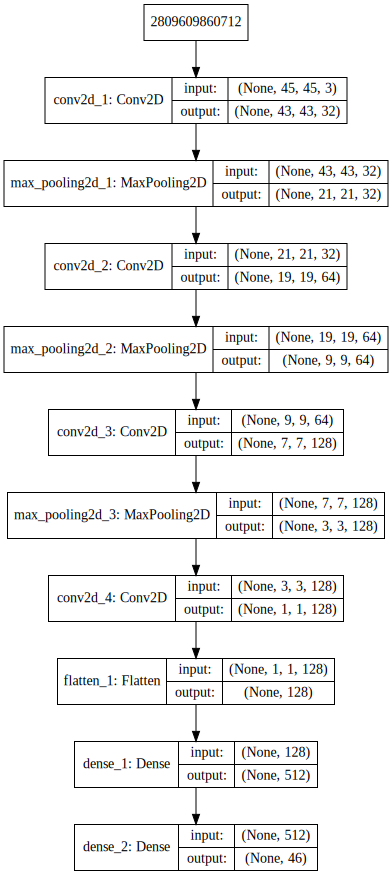

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

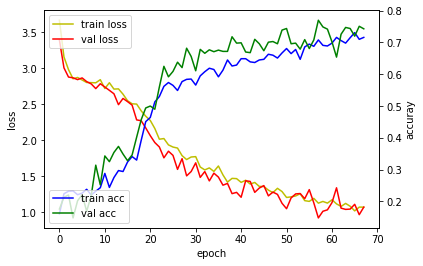

In [19]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [20]:
# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})



-- Predict --


In [21]:
print(output[0])

[0.000 0.000 0.000 0.005 0.000 0.984 0.001 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.006 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000]


In [22]:
scores = model.evaluate_generator(
            test_generator, 
            steps = 5)
model.save_weights('handwritten_noraml_checkpoint')
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


acc: 74.20%


#OpenCV 이용, 실시간 인식

step 1. 단순 이미지 영역 나누기

In [29]:
import numpy as np
import cv2

original_image = cv2.imread("yongs_written/test_0.jpg")
image = original_image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(thresh, kernel , iterations=4)

In [31]:
cnts = cv2.findContours(dilate.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

contours = []

threshold_min_area = 400
threshold_max_area = 3000

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if area > threshold_min_area and area < threshold_max_area:
        # cv2.drawContours(original_image,[c], 0, (0,255,0), 3)
        cv2.rectangle(original_image, (x,y), (x+w, y+h), (0,255,0),1)
        contours.append(c)


cv2.imshow("detected", original_image) 
print('contours detected: {}'.format(len(contours)),"개")
cv2.waitKey(0)

contours detected: 3 개


-1

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

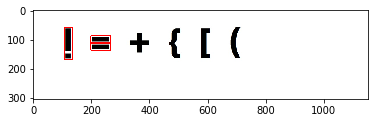

In [33]:
i=0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20: continue # 너무 작으면 건너뛰기
    red = (0, 0, 255)
    cv2.rectangle(image, (x, y), (x+w, y+h), red, 2)
    cv2.imwrite('capture/numbers-contour'+str(i)+'.png', image) 

cv2.imwrite('numbers100-contour.png', image) 

image = mpimg.imread("numbers100-contour.png")
plt.imshow(image)
plt.show()

In [26]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(45,45)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras

from keras.models import load_model
model = load_model('model_keras_generator.h5')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 3)    0                                            
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 43, 43, 256)  7168        input_1[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 256)          0           block1_conv2[0][0]               
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 256)          0           block1_conv2[0][0]               
__________________________________________________________________________________________________
reshape_1 